# First Charts with Leather

Before you start Jupyter Notebook, you should start by installing leather. So `source activate homework` and then type `pip install leather`
and you should be good to go.

Leather is a very simple -- but not terribly well documented yet -- charting library. It will give us our first foray into charts. We will use others as well.

As usual, the first line is always to import the library.

In [1]:
import leather

Leather works with very simple Python data structures -- lists of tuples, primarily. So if your data isn't a list of tuples, we'll have to get there eventually. For now, we're just going to hard code our data.

In [2]:
data = [
    (3, 'Hello'),
    (5, 'How'),
    (9, 'Are'),
    (4, 'You')
]

Now we need to create the chart. First thing we do is create a Leather Chart object, which is essentially a blank slate, and we give it a title. 

Our data, because of the structure of a number and a label, can make a chart with a type of Bars or Columns.

In [3]:
chart = leather.Chart('Bars')

Now that we've created a blank chart object, we need to add bars to it. Which is as easy as it sounds.

In [4]:
chart.add_bars(data)

Now we have to render it out. Leather renders charts out as SVG files, which can be edited in Illustrator or any other vector editor. Or, in Jupyter Notebooks, it can be output to the screen by not specifying a directory for it to be output into. 

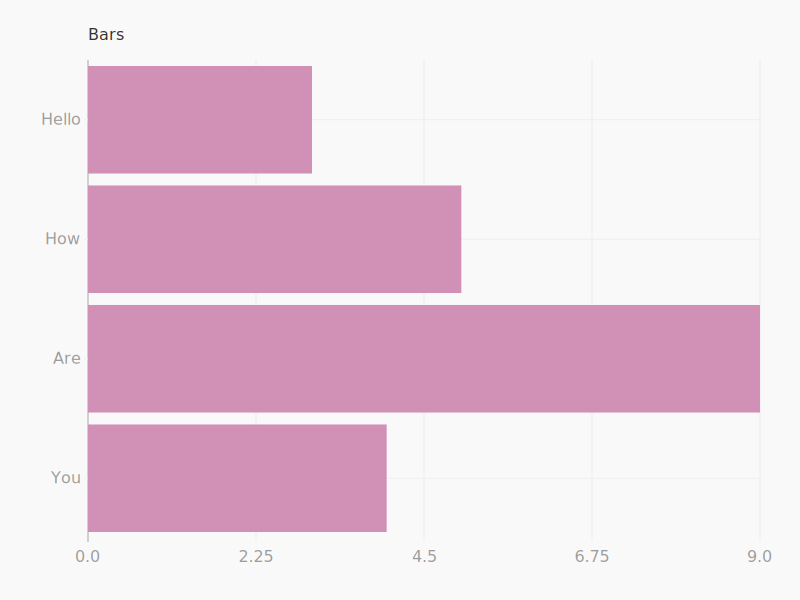

In [5]:
chart.to_svg()

Here's the exact same data, but in a column chart.

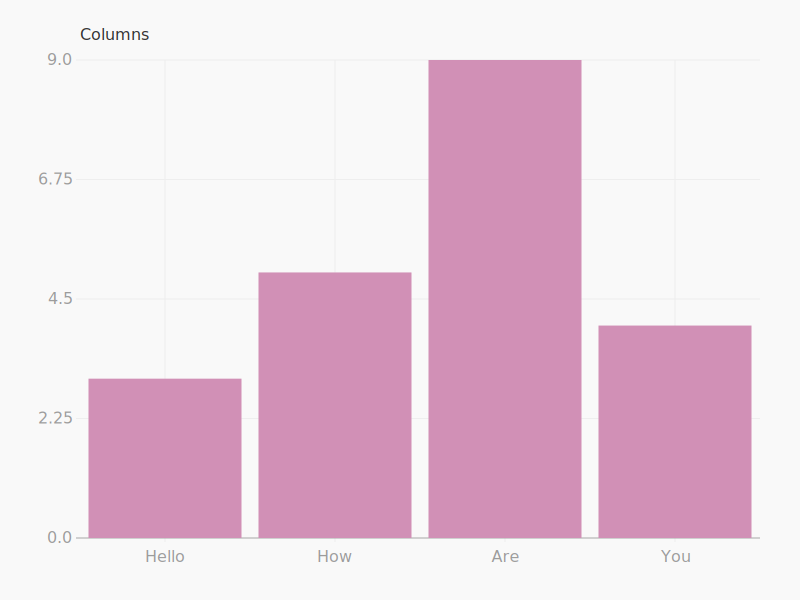

In [6]:
import leather

data = [
    ('Hello', 3),
    ('How', 5),
    ('Are', 9),
    ('You', 4)
]

chart = leather.Chart('Columns')
chart.add_columns(data)
chart.to_svg()

## A more complex example

But rarely will we hard code our data into the chart -- we certainly can do that, if speed is necessary and the amount of data we have is small, but why do that? 

So since we just learned how to use Agate, let's learn how to connect them together.

Plugging in Agate rendered data is not as straightforward as you might think but it's not hard to do once you recognize that Leather wants SIMPLE data structures, and Agate doesn't output those simple data structures. 

So let's reuse some data analysis we did from Agate with mountain lion sightings. You can copy and paste it from your old assignment. 

In [7]:
import agate
mountainlions = agate.Table.from_csv('../../Data/mountainlions.csv')
by_county = mountainlions.group_by('COUNTY')
county_totals = by_county.aggregate([
    ('count', agate.Count())
])
sorted_counties = county_totals.order_by('count', reverse=True).limit(10)

Now this is where things get a little wonky. Remember: Leather wants a list of tuples as output. So what is sorted_counties? It's an agate Table object. So the first thing we have to do, is make it a list of tuples. Fortunately, Python has a simple tool to do this called zip.

An agate Table object is a table with each column as a list. So what zip does is zip two lists into a tuple, matching them up. It's as easy as `zip(list1, list2)`, except we don't have list1 and list2. We have to access each list pythonically.

In [8]:
data = list(zip(sorted_counties.columns['count'], sorted_counties.columns['COUNTY']))

In [9]:
list(data)

[(Decimal('111'), 'Dawes'),
 (Decimal('52'), 'Sioux'),
 (Decimal('35'), 'Sheridan'),
 (Decimal('30'), 'Cherry'),
 (Decimal('26'), 'Scotts Bluff'),
 (Decimal('20'), 'Keya Paha'),
 (Decimal('15'), 'Brown'),
 (Decimal('11'), 'Rock'),
 (Decimal('10'), 'Lincoln'),
 (Decimal('8'), 'Custer')]

See the problem? See the difference between our hard coded example and this list? It's the Decimal business. We didn't have Decimal objects before -- we had integers -- and now we don't. Leather won't accept them, but we can convert them into Integers with a little Python fu.

So to start, let's create a new list of data and set it empty.

In [10]:
new_data = []

Now we'll loop through each item in data, convert that decimal to an integer, create a new tuple object and then append it to the new_data list we've created. It's easier than it sounds.

In [11]:
for item in data:
    number = int(item[0])
    new_data.append((number, item[1]))

In [12]:
list(new_data)

[(111, 'Dawes'),
 (52, 'Sioux'),
 (35, 'Sheridan'),
 (30, 'Cherry'),
 (26, 'Scotts Bluff'),
 (20, 'Keya Paha'),
 (15, 'Brown'),
 (11, 'Rock'),
 (10, 'Lincoln'),
 (8, 'Custer')]

Now we have something we can work with. It looks exactly like our data from before. So we can use the same code.

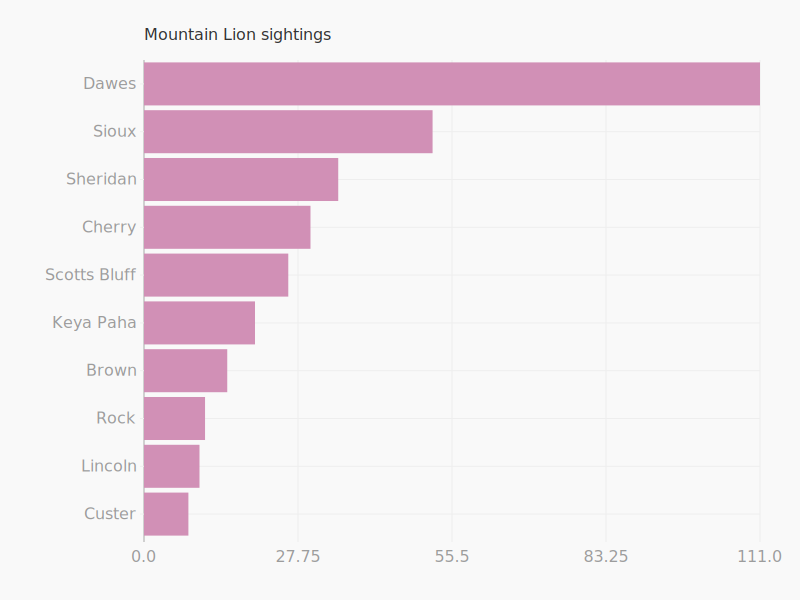

In [13]:
chart = leather.Chart('Mountain Lion sightings')
chart.add_bars(new_data)
chart.to_svg('')

# Assignent: Your first Leather charts

Take the data you cleaned out of the PDF and create two Leather charts out of it. The first should be hard coded, just the way we did it. The second should combine Agate and Leather together to create the chart. You can choose what you want to look at. 

Submit your ipynb file for credit.

In [14]:
enrollment = agate.Table.from_csv('../../Data/enrollment.csv')

In [15]:
print(enrollment)

|-------------------------+------------|
|  column                 | data_type  |
|-------------------------+------------|
|  College                | Text       |
|  Degree                 | Text       |
|  MajorCode              | Text       |
|  MajorName              | Text       |
|  NonResidentAlienMale   | Number     |
|  NonResidentAlienFemale | Number     |
|  HispanicMale           | Number     |
|  HIspanicFemale         | Number     |
|  AmericanIndianMale     | Number     |
|  AmericanIndianFemale   | Number     |
|  AsianMale              | Number     |
|  AsianFemale            | Number     |
|  BlackMale              | Number     |
|  BlackFemale            | Number     |
|  NativeHawaiianMale     | Number     |
|  NativeHawaiianFemale   | Boolean    |
|  WhiteMale              | Number     |
|  WhiteFemale            | Number     |
|  TwoRacesMale           | Number     |
|  TwoRacesFemale         | Number     |
|  ...                    | ...        |
|---------------